In [3]:
#load 100 sentences with a classification Q/S/C
import numpy as np
import pandas as pd

CODE_LOC = '/home/adarsh/Downloads/'   # !! Modify to path to "features.py" folder lcoation
DATA_LOC = '/home/adarsh/Downloads/sentences.csv'  # !! Modify this to the CSV data location

sentences = pd.read_csv(filepath_or_buffer = DATA_LOC)  

In [4]:
sentences.head(10)

,SENTENCE,CLASS
0,"Sorry, I don't know about the weather.",S
1,That is a tricky question to answer.,C
2,What does OCM stand for,Q
3,MAX is a Mobile Application Accelerator,S
4,Can a dog see in colour?,Q
5,how are you,C
6,If you deploy a MySQL database in the Oracle c...,Q
7,who is dominic Fakename,Q
8,what's the weather like today?,C
9,Can the OCM host non Oracle software stacks?,Q


In [4]:
sentences.shape

(100, 2)

In [5]:
# Extract some patterns of PoS sequences
import nltk
from nltk import word_tokenize

list_of_triple_strings = []  # triple sequence of PoS tags
sentence = "Can a dog see in colour?"

sentenceParsed = word_tokenize(sentence)
pos_tags = nltk.pos_tag(sentenceParsed)
pos = [ i[1] for i in pos_tags ]
print("Words mapped to Part of Speech Tags:",pos_tags)
print("PoS Tags:", pos)

n = len(pos)
for i in range(0,n-3):
    t = "-".join(pos[i:i+3]) # pull out 3 list item from counter, convert to string
    list_of_triple_strings.append(t)
    
print("sequences of triples:", list_of_triple_strings)

Words mapped to Part of Speech Tags: [('Can', 'MD'), ('a', 'DT'), ('dog', 'NN'), ('see', 'NN'), ('in', 'IN'), ('colour', 'NN'), ('?', '.')]
PoS Tags: ['MD', 'DT', 'NN', 'NN', 'IN', 'NN', '.']
sequences of triples: ['MD-DT-NN', 'DT-NN-NN', 'NN-NN-IN', 'NN-IN-NN']


In [7]:
import sys
sys.path.append(CODE_LOC)  # set search path to code cloned from GitHub
import features            # bespoke "feature engineering" module

sentence = "Can a dog see in colour?"

sentence = features.strip_sentence(sentence)
print(sentence)
pos = features.get_pos(sentence)
triples = features.get_triples(pos)

print(triples)

Can a dog see in colour
['MD-DT-NN', 'DT-NN-NN', 'NN-NN-IN', 'NN-IN-NN']


In [8]:
#### Bespoke Features Generator Example - Get a Python Dictionary of Features ####
sentences = ["Can a dog see in colour?",
             "Hey, How's it going?",
             "Oracle 12.2 will be released for on-premises users on 15 March 2017",
             "When will Oracle 12 be released"]
id = 1
for s in sentences:
    features_dict = features.features_dict(str(id),s)
    features_string,header = features.get_string(str(id),s)
    print(features_dict)
    #print(features_string)
    id += 1

{'id': '1', 'qMark': 1, 'wordCount': 6, 'stemmedCount': 4, 'qVerbCombo': 1, 'verbBeforeNoun': 1, 'VBG': 0, 'VBZ': 0, 'NNP': 0, 'NN': 3, 'NNS': 0, 'NNPS': 0, 'PRP': 0, 'CD': 0, 'stemmedEndNN': 0, 'startTuple0': 0, 'endTuple0': 1, 'endTuple1': 0, 'endTuple2': 0, 'qTripleScore': 0, 'sTripleScore': 0, 'class': 'X'}
{'id': '2', 'qMark': 1, 'wordCount': 4, 'stemmedCount': 3, 'qVerbCombo': 1, 'verbBeforeNoun': 0, 'VBG': 1, 'VBZ': 0, 'NNP': 2, 'NN': 0, 'NNS': 0, 'NNPS': 0, 'PRP': 1, 'CD': 0, 'stemmedEndNN': 0, 'startTuple0': 0, 'endTuple0': 0, 'endTuple1': 0, 'endTuple2': 0, 'qTripleScore': 0, 'sTripleScore': 0, 'class': 'X'}
{'id': '3', 'qMark': 0, 'wordCount': 12, 'stemmedCount': 8, 'qVerbCombo': 1, 'verbBeforeNoun': 0, 'VBG': 0, 'VBZ': 0, 'NNP': 1, 'NN': 1, 'NNS': 1, 'NNPS': 0, 'PRP': 0, 'CD': 3, 'stemmedEndNN': 0, 'startTuple0': 0, 'endTuple0': 0, 'endTuple1': 0, 'endTuple2': 0, 'qTripleScore': 0, 'sTripleScore': 2, 'class': 'X'}
{'id': '4', 'qMark': 0, 'wordCount': 6, 'stemmedCount': 4, '

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

FNAME = '/home/adarsh/Downloads/featuresDump.csv' # !! Modify this to the CSV data location

df = pd.read_csv(filepath_or_buffer = FNAME, )   
print(str(len(df)), "rows loaded")

# Strip any leading spaces from col names
df.columns = df.columns[:].str.strip()
df['class'] = df['class'].map(lambda x: x.strip())

width = df.shape[1]

100 rows loaded


In [10]:
#split into test and training (is_train: True / False col)
np.random.seed(seed=1)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
print(str(len(train)), " rows split into training set,", str(len(test)), "split into test set.")

features = df.columns[1:width-1]  #remove the first ID col and last col=classifier
print("FEATURES = {}".format(features))

77  rows split into training set, 23 split into test set.
FEATURES = Index(['wordCount', 'stemmedCount', 'stemmedEndNN', 'CD', 'NN', 'NNP', 'NNPS',
       'NNS', 'PRP', 'VBG', 'VBZ', 'startTuple0', 'endTuple0', 'endTuple1',
       'endTuple2', 'verbBeforeNoun', 'qMark', 'qVerbCombo', 'qTripleScore',
       'sTripleScore'],
      dtype='object')


In [11]:
# Fit an RF Model for "class" given features
clf = RandomForestClassifier(n_jobs=2, n_estimators = 100)
clf.fit(train[features], train['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
# Predict against test set
preds = clf.predict(test[features])
predout = pd.DataFrame({ 'id' : test['id'], 'predicted' : preds, 'actual' : test['class'] })

In [13]:
print(predout)

                   id predicted actual
13   31cedeb4e04fba02         Q      Q
20   af7dd6b70d544b56         S      S
21   584d5d4428d60a5f         S      Q
24   9140ee537fbe5390         Q      Q
25   cabf9e317ba4a072         S      S
29   3d25a26134f0e450         Q      Q
32   280b0360e0d3ffc1         S      S
37   0d4a13fc4cce6dab         Q      Q
39   35179a54ea587953         C      C
40   8cdda20f1ae22213         C      C
43   8798ff1fe7ac435d         Q      Q
46   bc013bdd28614223         S      S
68   7055c710336d670c         Q      Q
70   3b416352816dc854         Q      Q
73   601fdf6ab85a9875         S      S
76   498b643ac17bcc7d         C      S
78   64e22039495c59bf         S      S
80   cc0c263a455bb702         S      S
82   8b1a9953c4611296         C      C
85   6b2d6039a794fb49         S      S
87   94590dd047fcbfce         S      S
91   7a0fc645497df2c6         Q      Q
96   ecef7fa7fcb25f20         S      S


In [14]:
## Cross-check accuracy ##
print(pd.crosstab(test['class'], preds, rownames=['actual'], colnames=['preds']))
print("\n",pd.crosstab(test['class'], preds, rownames=['actual']
                       , colnames=['preds']).apply(lambda r: round(r/r.sum()*100,2), axis=1) )

from sklearn.metrics import accuracy_score
print("\n\nAccuracy Score: ", round(accuracy_score(test['class'], preds),3) ) # https://en.wikipedia.org/wiki/Jaccard_index

preds   C  Q   S
actual          
C       3  0   0
Q       0  8   1
S       1  0  10

 preds        C      Q      S
actual                      
C       100.00   0.00   0.00
Q         0.00  88.89  11.11
S         9.09   0.00  90.91


Accuracy Score:  0.913


In [15]:
# load in some pre-formated FAQ data in a CSV
FNAME = '/home/adarsh/Downloads/pythonFAQ.csv' # !! Modify this to the CSV data location

import csv
import hashlib 

import features

fin = open(FNAME, 'rt')
reader = csv.reader(fin)

keys = ["id",
"wordCount",
"stemmedCount",
"stemmedEndNN",
"CD",
"NN",
"NNP",
"NNPS",
"NNS",
"PRP",
"VBG",
"VBZ",
"startTuple0",
"endTuple0",
"endTuple1",
"endTuple2",
"verbBeforeNoun",
"qMark",
"qVerbCombo",
"qTripleScore",
"sTripleScore",
"class"]

rows = []

next(reader)  #Assume we have a header 
for line in reader:
    sentence = line[0]  
    c = line[1]        #class-label
    id = hashlib.md5(str(sentence).encode('utf-8')).hexdigest()[:16] # generate a unique ID
    
    f = features.features_dict(id,sentence, c)
    row = []
    
    for key in keys:
        value = f[key]
        row.append(value)
    rows.append(row)
    
faq = pd.DataFrame(rows, columns=keys)
fin.close()

In [16]:
# Predict against FAQ test set
featureNames = faq.columns[1:width-1]  #remove the first ID col and last col=classifier
faqPreds = clf.predict(faq[featureNames])

predout = pd.DataFrame({ 'id' : faq['id'], 'predicted' : faqPreds, 'actual' : faq['class'] })

In [17]:
## Cross-check accuracy ##
print(pd.crosstab(faq['class'], faqPreds, rownames=['actual'], colnames=['preds']))

print("\n",pd.crosstab(faq['class'], faqPreds, rownames=['actual'],
                       colnames=['preds']).apply(lambda r: round(r/r.sum()*100,2), axis=1) )

preds    C   Q   S
actual            
C       12   5   2
Q        0  14   2
S        0   3  13

 preds       C      Q      S
actual                     
C       63.16  26.32  10.53
Q        0.00  87.50  12.50
S        0.00  18.75  81.25


In [18]:
print("Accuracy Score:", round(accuracy_score(faq['class'], faqPreds) ,3) )

Accuracy Score: 0.765


In [19]:
textout = {'Q': "QUESTION", 'C': "CHAT", 'S':"STATEMENT"}

mySentence = "Scikit-learn is a popular Python library for Machine Learning."
#mySentence = "The cat is dead"
#mySentence = "Is the cat dead"

myFeatures = features.features_dict('1',mySentence, 'X')

values=[]
for key in keys:
    values.append(myFeatures[key])

s = pd.Series(values)
width = len(s)
myFeatures = s[1:width-1]  #All but the last item (this is the class for supervised learning mode)
predict = clf.predict([myFeatures])

print("\n\nPrediction is: ", textout[predict[0].strip()])



Prediction is:  STATEMENT


In [20]:
from nltk.corpus import reuters
categories = reuters.categories()
print("Number of Categories:",len(categories))
print(categories[0:9],categories[-10:])

Number of Categories: 90
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil'] ['sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [21]:
words = reuters.words()
print("number of words", len(words) )
print("first 10 words:", words[0:9])

number of words 1720901
first 10 words: ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-']


In [22]:
#Extract at a sepecific category
tradeWords = reuters.words(categories = 'trade')
len(tradeWords)

142723

In [23]:
from nltk.corpus import stopwords
import string
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# This takes a couple of minutes to run
tradeWords = [w for w in tradeWords if w.lower() not in stopwords.words('english') ]

In [25]:
tradeWords = [w for w in tradeWords if w not in string.punctuation]
punctCombo = [c+"\"" for c in string.punctuation ]+ ["\""+c for c in string.punctuation ]
tradeWords = [w for w in tradeWords if w not in punctCombo]
len(tradeWords)

78019

In [26]:
fdist = nltk.FreqDist(tradeWords)
fdist.plot(20, cumulative=False)
# (installed Ghostscript on my PC to get this working in Jupyter

<Figure size 640x480 with 1 Axes>

In [27]:
for word, frequency in fdist.most_common(10):
    print(word, frequency)

said 2177
trade 1518
U 1452
billion 1063
Japan 720
dlrs 628
year 610
would 592
pct 520
mln 475


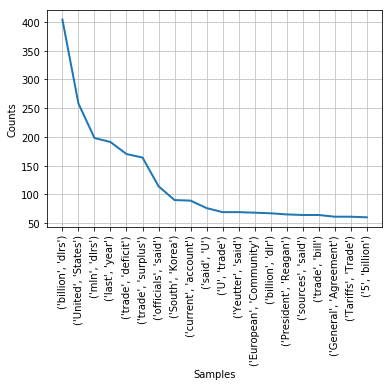

In [28]:
biTradeWords = nltk.bigrams(tradeWords)
biFdist = nltk.FreqDist(biTradeWords)
biFdist.plot(20, cumulative=False)

In [29]:
from nltk.corpus import treebank
words = treebank.words()
tagged = treebank.tagged_words()
print(type(tagged))
print("Word Count", len(words))
print("Tagged words sample: ",tagged[0:9])

<class 'nltk.corpus.reader.util.ConcatenatedCorpusView'>
Word Count 100676
Tagged words sample:  [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB')]


In [30]:
parsed = treebank.parsed_sents()[0]
print(parsed)
type(parsed)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


nltk.tree.Tree

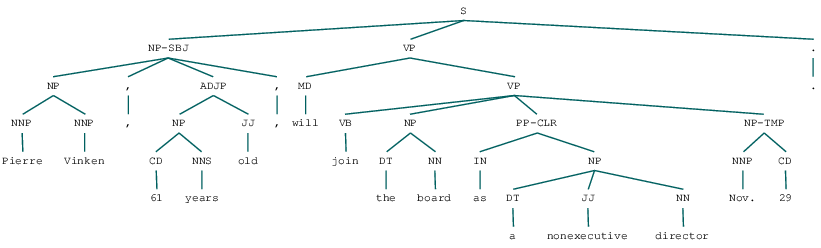

In [31]:
import IPython
IPython.core.display.display(parsed)

In [1]:
import nltk
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

sentence = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
i=0
for tree in parser.parse(sentence):
    i=i+1
    print("Tree", i)
    print(tree)

Tree 1
(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
Tree 2
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


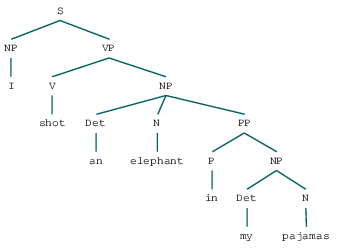

In [2]:
#tree.draw()  # alternative NLTK native method
import IPython
IPython.core.display.display(tree)
# (installed Ghostscript on my PC to get this working in Jupyter)

In [18]:
import os
import sys
from nltk.parse.stanford import StanfordDependencyParser
path = '/home/adarsh/Downloads/stanford-corenlp-full-2018-02-27/'   # Set this to where you have downloaded the JAR file to
path_to_jar = path + 'stanford-corenlp-3.9.1.jar'
path_to_models_jar = path + 'stanford-corenlp-3.9.1-models.jar'

dependency_parser = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)
os.environ['JAVAHOME'] = '/usr/local/java/jdk1.8.0_172/'  # Set this to where the JDK is 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPDependencyParser instead.
  
